<a href="https://colab.research.google.com/github/AdarshNagpure/Find-Me-SOC-project/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Linear Regression

In [132]:
# define an array x of atleast 100 points with a separation of at least 1
arr_x = np.arange(0, 100, 1)
print(arr_x)




# now choose any 2 values for A, B and generate an array y_true such that y_true = Ax + B for all x defined above
A=2
B=5
y_true = A*arr_x + B
print(y_true)




[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[  5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35  37  39
  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71  73  75
  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107 109 111
 113 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143 145 147
 149 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179 181 183
 185 187 189 191 193 195 197 199 201 203]


In [133]:
# Add Gaussian Noise which can vary from upto -20 to 20 to y_true to get our data
mu = 0  # Mean of the Gaussian distribution
sigma = 10  # Standard deviation of the Gaussian distribution
noise = np.random.normal(mu, sigma, size=len(y_true))
data = y_true + noise
print(data)


[ 2.60554337e+00  2.53327779e+01 -1.19099369e-01 -4.16907455e+00
 -8.96593863e+00  9.15431260e+00  2.52579775e+01  3.03116080e+01
  3.34143859e+01  6.93495295e+00  3.35856538e+01  2.39617782e+01
  1.89284430e+01  7.65256088e+00  1.95955139e+01  4.05338907e+01
  2.81603570e+01  3.40281447e+01  2.68329407e+01  4.09610113e+01
  3.49856132e+01  6.45191346e+01  3.74039897e+01  4.79058547e+01
  5.32761544e+01  4.86427395e+01  3.69737162e+01  5.69700621e+01
  3.87407916e+01  7.70809704e+01  5.87504258e+01  6.87789307e+01
  6.19346144e+01  4.90019924e+01  7.59005570e+01  8.49279093e+01
  8.38585663e+01  7.48889340e+01  7.88412783e+01  8.70511541e+01
  1.02688696e+02  7.88146873e+01  9.16166313e+01  8.98039906e+01
  9.71917688e+01  8.95605364e+01  9.01598184e+01  1.27630492e+02
  9.62455275e+01  9.94080000e+01  1.16781089e+02  9.22012151e+01
  1.15140939e+02  1.17734334e+02  1.17281525e+02  1.01659667e+02
  1.15362466e+02  1.27498484e+02  1.10402155e+02  1.16991686e+02
  1.13087045e+02  1.20718

In [134]:
# print the data, y_true and x
print("data", data )
print("        ")
print("y_true", y_true )
print("        ")
print("x", arr_x )


data [ 2.60554337e+00  2.53327779e+01 -1.19099369e-01 -4.16907455e+00
 -8.96593863e+00  9.15431260e+00  2.52579775e+01  3.03116080e+01
  3.34143859e+01  6.93495295e+00  3.35856538e+01  2.39617782e+01
  1.89284430e+01  7.65256088e+00  1.95955139e+01  4.05338907e+01
  2.81603570e+01  3.40281447e+01  2.68329407e+01  4.09610113e+01
  3.49856132e+01  6.45191346e+01  3.74039897e+01  4.79058547e+01
  5.32761544e+01  4.86427395e+01  3.69737162e+01  5.69700621e+01
  3.87407916e+01  7.70809704e+01  5.87504258e+01  6.87789307e+01
  6.19346144e+01  4.90019924e+01  7.59005570e+01  8.49279093e+01
  8.38585663e+01  7.48889340e+01  7.88412783e+01  8.70511541e+01
  1.02688696e+02  7.88146873e+01  9.16166313e+01  8.98039906e+01
  9.71917688e+01  8.95605364e+01  9.01598184e+01  1.27630492e+02
  9.62455275e+01  9.94080000e+01  1.16781089e+02  9.22012151e+01
  1.15140939e+02  1.17734334e+02  1.17281525e+02  1.01659667e+02
  1.15362466e+02  1.27498484e+02  1.10402155e+02  1.16991686e+02
  1.13087045e+02  1.

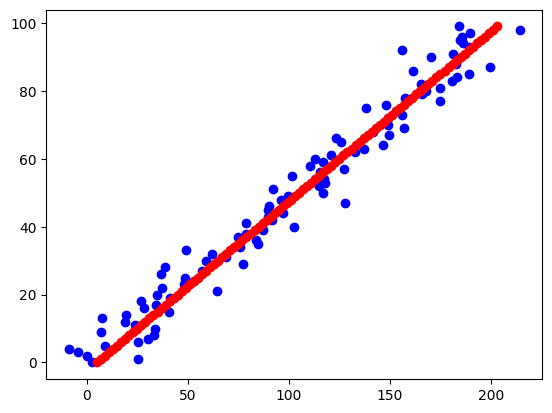

In [135]:
# plot scatterplot between data and x
# also plot y_true vs x on the same plot
plt.scatter(data, arr_x, color = "blue", label = "Data")
plt.scatter(y_true, arr_x, color = "red", label = "y_true")
plt.show()




In [136]:
# write a function definition to calculate loss of linear Regression

def calculate_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)/100
print(calculate_loss(y_true, data))



1.2756474520013719


In [137]:
# write a function definition to calculate derivative of cost function of linear regression with respect to parameter A

def calculate_derivative_A(x, y_true, y_pred):
    return -2 * np.mean((y_true - y_pred) * x)/len(y_true)

In [138]:
# write a function definition to calculate derivative of cost function of linear regression with respect to parameter B

def calculate_derivative_B(y_true, y_pred):
    return -2 * np.mean(y_true - y_pred)/len(y_true)



In [139]:
# define A = 0 and B = 0 randomly
# also define 2 lists to store values of A and B at various iterations

A = np.random.random()
B = np.random.random()

# Creating lists to store values of A and B
A_values = []
B_values = []

# Adding initial values to the lists
A_values.append(A)
B_values.append(B)




In [140]:
# compute the model array based on initial values of A and B
# Also print the cost function for the data before training

y_true = A * arr_x + B
print(y_true)
print("     ")
initial_cost = calculate_loss(data, y_true)
print("Initial cost:", initial_cost)


[ 0.50559222  0.65877634  0.81196045  0.96514457  1.11832868  1.2715128
  1.42469692  1.57788103  1.73106515  1.88424926  2.03743338  2.19061749
  2.34380161  2.49698572  2.65016984  2.80335395  2.95653807  3.10972218
  3.2629063   3.41609041  3.56927453  3.72245864  3.87564276  4.02882687
  4.18201099  4.3351951   4.48837922  4.64156334  4.79474745  4.94793157
  5.10111568  5.2542998   5.40748391  5.56066803  5.71385214  5.86703626
  6.02022037  6.17340449  6.3265886   6.47977272  6.63295683  6.78614095
  6.93932506  7.09250918  7.24569329  7.39887741  7.55206152  7.70524564
  7.85842975  8.01161387  8.16479799  8.3179821   8.47116622  8.62435033
  8.77753445  8.93071856  9.08390268  9.23708679  9.39027091  9.54345502
  9.69663914  9.84982325 10.00300737 10.15619148 10.3093756  10.46255971
 10.61574383 10.76892794 10.92211206 11.07529617 11.22848029 11.38166441
 11.53484852 11.68803264 11.84121675 11.99440087 12.14758498 12.3007691
 12.45395321 12.60713733 12.76032144 12.91350556 13.0

In [141]:
data

array([ 2.60554337e+00,  2.53327779e+01, -1.19099369e-01, -4.16907455e+00,
       -8.96593863e+00,  9.15431260e+00,  2.52579775e+01,  3.03116080e+01,
        3.34143859e+01,  6.93495295e+00,  3.35856538e+01,  2.39617782e+01,
        1.89284430e+01,  7.65256088e+00,  1.95955139e+01,  4.05338907e+01,
        2.81603570e+01,  3.40281447e+01,  2.68329407e+01,  4.09610113e+01,
        3.49856132e+01,  6.45191346e+01,  3.74039897e+01,  4.79058547e+01,
        5.32761544e+01,  4.86427395e+01,  3.69737162e+01,  5.69700621e+01,
        3.87407916e+01,  7.70809704e+01,  5.87504258e+01,  6.87789307e+01,
        6.19346144e+01,  4.90019924e+01,  7.59005570e+01,  8.49279093e+01,
        8.38585663e+01,  7.48889340e+01,  7.88412783e+01,  8.70511541e+01,
        1.02688696e+02,  7.88146873e+01,  9.16166313e+01,  8.98039906e+01,
        9.71917688e+01,  8.95605364e+01,  9.01598184e+01,  1.27630492e+02,
        9.62455275e+01,  9.94080000e+01,  1.16781089e+02,  9.22012151e+01,
        1.15140939e+02,  

In [142]:
# Define the Learning rate, alpha randomly. You will have to modify it during training
alpha = 0.00001


In [143]:
# write the main training loop and train for atleast 2000 iterations
# print the cost at each iteration while training
# save the values of A and B at atleast 5 different iterations spaced by atleast 50 into the lists defined earlier
# Also, make sure you use the same model to find derivative of cost wrto A and B and then modify A and B together

num_iterations = 2000
for iteration in range(num_iterations):
    # Computing the derivatives of the cost function
    derivative_A = calculate_derivative_A(arr_x, data, y_true)
    derivative_B = calculate_derivative_B(data, y_true)
    
    # Updating A and B together
    A -= alpha * derivative_A
    B -= alpha * derivative_B
    
    # Computing the new predicted values
    y_true = A * arr_x + B
    # Calculating and printing the cost at each iteration
    cost = calculate_loss(data, y_true)
    print("Iteration:", iteration + 1, "Cost:", cost)
    

# Printing the final cost
final_cost = calculate_loss(data, y_true)
print("Final cost:", final_cost)









Iteration: 1 Cost: 118.81009528869895
Iteration: 2 Cost: 118.65570440248784
Iteration: 3 Cost: 118.5015162727418
Iteration: 4 Cost: 118.34753063318735
Iteration: 5 Cost: 118.19374721790084
Iteration: 6 Cost: 118.04016576130782
Iteration: 7 Cost: 117.88678599818253
Iteration: 8 Cost: 117.73360766364763
Iteration: 9 Cost: 117.58063049317354
Iteration: 10 Cost: 117.42785422257819
Iteration: 11 Cost: 117.27527858802632
Iteration: 12 Cost: 117.12290332602925
Iteration: 13 Cost: 116.9707281734443
Iteration: 14 Cost: 116.81875286747437
Iteration: 15 Cost: 116.6669771456675
Iteration: 16 Cost: 116.51540074591634
Iteration: 17 Cost: 116.36402340645786
Iteration: 18 Cost: 116.21284486587268
Iteration: 19 Cost: 116.06186486308485
Iteration: 20 Cost: 115.91108313736113
Iteration: 21 Cost: 115.76049942831084
Iteration: 22 Cost: 115.61011347588517
Iteration: 23 Cost: 115.45992502037687
Iteration: 24 Cost: 115.30993380241983
Iteration: 25 Cost: 115.16013956298833
Iteration: 26 Cost: 115.0105420433970

use multiple values of A and B in the initial step of generating y_true and comment on the learning rate. Also comment on how many iterations were sufficient to arrive very close to the actual solution. I hope your answer is less than 2000 🙂

In [144]:
# print the two lists for A and B and see how those values change with number of iterations
save_iterations = [50, 100, 150, 200, 250]  # Iterations to save A and B values

for iteration in range(num_iterations):
    if iteration + 1 in save_iterations:
        A_values.append(A)
        B_values.append(B)
        print(A_values)


[0.15318411522879283, 1.5375232944427235]
[0.15318411522879283, 1.5375232944427235, 1.5375232944427235]
[0.15318411522879283, 1.5375232944427235, 1.5375232944427235, 1.5375232944427235]
[0.15318411522879283, 1.5375232944427235, 1.5375232944427235, 1.5375232944427235, 1.5375232944427235]
[0.15318411522879283, 1.5375232944427235, 1.5375232944427235, 1.5375232944427235, 1.5375232944427235, 1.5375232944427235]


In [145]:
# generate different models for A and B you stored in the lists while training
models = []
for i in range(len(A_values)):
    models.append(A_values[i] * arr_x + B_values[i])
for iteration in range(num_iterations):
    # Compute the derivatives of the cost function
    derivative_A = calculate_derivative_A(arr_x, data, y_true)
    derivative_B = calculate_derivative_B(data, y_true)
    
    # Update A and B together
    A -= alpha * derivative_A
    B -= alpha * derivative_B
    
    # Compute the new predicted values
    y_true = A * arr_x + B
    cost = calculate_loss(data, y_true)
    print("Iteration:", iteration + 1, "Cost:", cost)
    
    # Save A and B values at specified iterations
    if iteration + 1 in save_iterations:
        A_values.append(A)
        B_values.append(B)
        
        # Generate a new model array based on the updated A and B values
        models.append(A * arr_x + B)
        final_cost = calculate_loss(data, y_true)
print("Final cost:", final_cost)

# Print the lists of A and B values
print("A values:", A_values)
print("B values:", B_values)






Iteration: 1 Cost: 9.736124701204629
Iteration: 2 Cost: 9.724977066339417
Iteration: 3 Cost: 9.713844071295005
Iteration: 4 Cost: 9.7027256968454
Iteration: 5 Cost: 9.691621923789855
Iteration: 6 Cost: 9.680532732952843
Iteration: 7 Cost: 9.669458105184011
Iteration: 8 Cost: 9.658398021358167
Iteration: 9 Cost: 9.647352462375231
Iteration: 10 Cost: 9.636321409160205
Iteration: 11 Cost: 9.625304842663132
Iteration: 12 Cost: 9.614302743859094
Iteration: 13 Cost: 9.603315093748147
Iteration: 14 Cost: 9.592341873355291
Iteration: 15 Cost: 9.58138306373045
Iteration: 16 Cost: 9.570438645948443
Iteration: 17 Cost: 9.559508601108936
Iteration: 18 Cost: 9.548592910336415
Iteration: 19 Cost: 9.537691554780155
Iteration: 20 Cost: 9.5268045156142
Iteration: 21 Cost: 9.515931774037286
Iteration: 22 Cost: 9.505073311272877
Iteration: 23 Cost: 9.494229108569078
Iteration: 24 Cost: 9.483399147198611
Iteration: 25 Cost: 9.472583408458808
Iteration: 26 Cost: 9.461781873671557
Iteration: 27 Cost: 9.4509

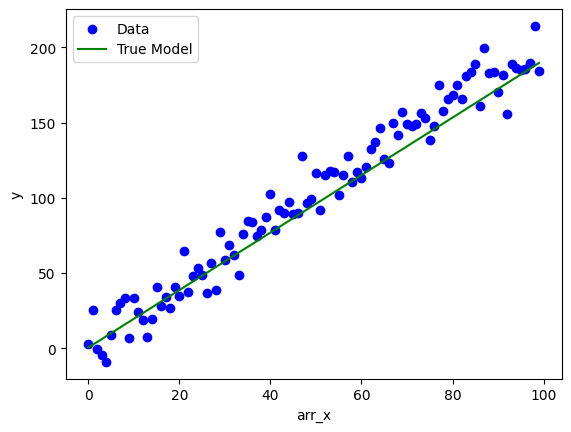

In [146]:
# plot the different models you defined earlier and also y_true vs x on the same plot
# use different colours, though the lines may not be visible distinctly which is ok

plt.scatter(arr_x, data, color='blue', label='Data')
plt.plot(arr_x, y_true, color='green', label='True Model')


plt.xlabel('arr_x')
plt.ylabel('y')
plt.legend()
plt.show()









So, I hope you arrive at the conclusion that if you choose the Learning rate alpha carefully you can reach very close to the actual answer in linear regression in very small number of iterations. This is important because while training a model you should always try to use the least amount of computational resources

Also, we used just one variable x in the assignment, because that makes it easier to visualize what is happening while training. But the same process works for linear regression with more than 1 variable.

## Logistic Regression

use the following data to train logistic Regression model. I have plotted the data already so you can see how it looks. One point to note here is that I have taken some overlapping examples deliberately because in real life you don't always get a clear distinguishing line.

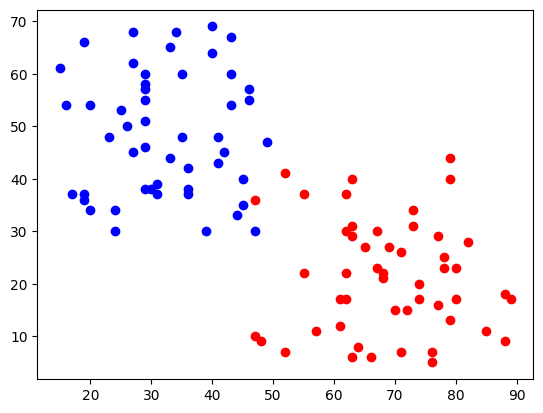

In [147]:
x2_1 = np.random.randint(30, 70, 50)
x1_1 = np.random.randint(15, 50, 50)
x1_0 = np.random.randint(45, 90, 50)
x2_0 = np.random.randint(5, 45, 50)

x1 = np.hstack((x1_0, x1_1))
x2 = np.hstack((x2_0, x2_1))

x1 = x1/1000 
x2 = x2/1000

y0 = np.zeros(50)
y1 = np.ones(50)
data = np.hstack((y0, y1))

plt.scatter(x1_1, x2_1, color="blue")
plt.scatter(x1_0, x2_0, color="red")
plt.show()

## Line we are considering as a distinguishing line is-
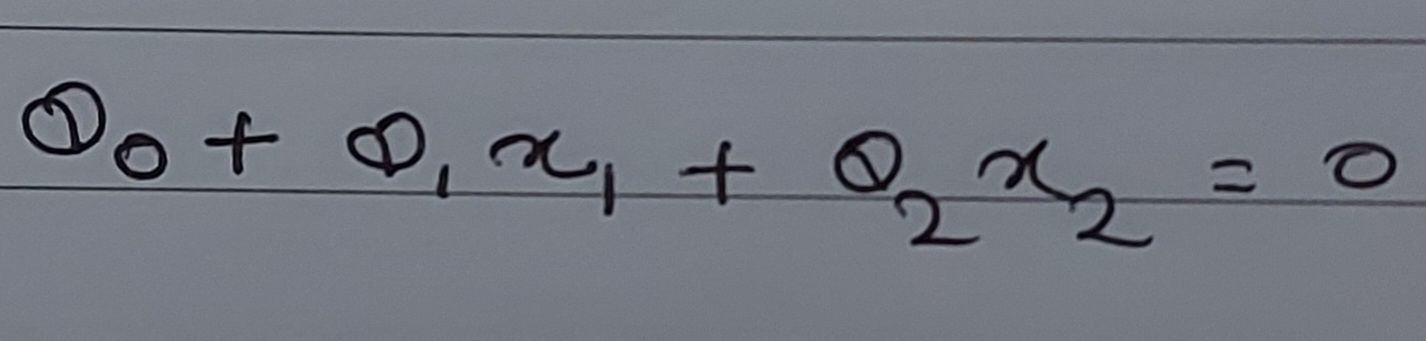

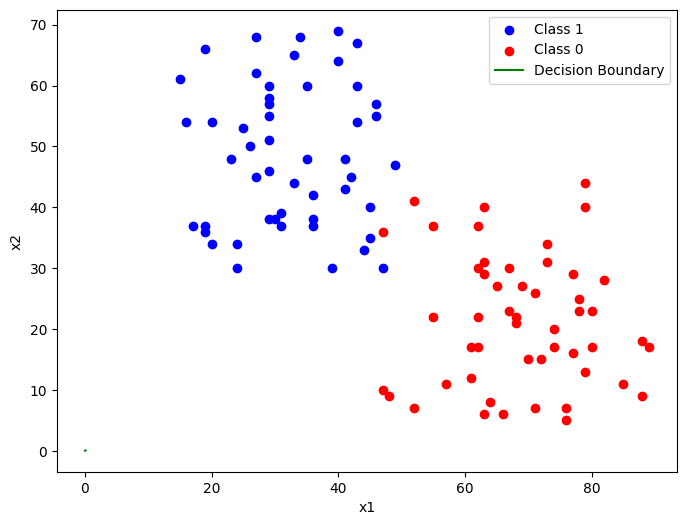

In [148]:
# sigmoid function
theta = np.random.random(size=3)

X = np.vstack((np.ones_like(x1), x1, x2)).T

alpha = 0.1
num_iterations = 1000

for iteration in range(num_iterations):
    z = np.dot(X, theta)
    y_pred = sigmoid(z)
    gradient = np.dot(X.T, y_pred - data) / len(data)
    theta -= alpha * gradient

x1_boundary = np.linspace(min(x1), max(x1), 100)
x2_boundary = -(theta[0] + theta[1] * x1_boundary) / theta[2]

plt.figure(figsize=(8, 6))
plt.scatter(x1_1, x2_1, color="blue", label="Class 1")
plt.scatter(x1_0, x2_0, color="red", label="Class 0")
plt.plot(x1_boundary, x2_boundary, color="green", label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


In [149]:
# function to compute cost of Logistic Regression

def compute_cost(X, y, theta):
    m = len(y)
    z = np.dot(X, theta)
    h = sigmoid(z)
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return cost

cost = compute_cost(X, data, theta)
print(f"Iteration {iteration+1}: Cost = {cost}")


Iteration 1000: Cost = 0.6781190649193589


In [150]:
# function to compute the derivative of cost with respect to theta1
def compute_gradient_theta1(X, y, theta):
    m = len(y)
    z = np.dot(X, theta)
    h = sigmoid(z)
    gradient_theta1 = np.dot(X[:, 1].T, h - y) / m
    return gradient_theta1
gradient_theta1 = compute_gradient_theta1(X, data, theta)
print(gradient_theta1)




0.00894533115375098


In [151]:
# function to compute the derivative of cost with respect to theta2

def compute_gradient_theta2(X, y, theta):
    m = len(y)
    z = np.dot(X, theta)
    h = sigmoid(z)
    gradient_theta2 = np.dot(X[:, 2].T, h - y) / m
    return gradient_theta2

gradient_theta2 = compute_gradient_theta2(X, data, theta)
print(gradient_theta2)




-0.006661864144135673


In [152]:
# function to compute the derivative of cost with respect to theta0
def compute_gradient_theta0(X, y, theta):
    m = len(y)
    z = np.dot(X, theta)
    h = sigmoid(z)
    gradient_theta0 = np.dot(X[:, 0].T, h - y) / m
    return gradient_theta0
gradient_theta0 = compute_gradient_theta0(X, data, theta)
print(gradient_theta0)




-0.00021930024618682653


In [153]:
# randomly initialize theta0, theta1, theta2 and compute and print the initial cost

theta = np.random.randn(3)

X = np.column_stack((np.ones(len(x1)), x1, x2))
initial_cost = compute_cost(X, data, theta)

print("Initial Cost:", initial_cost)









Initial Cost: 1.220355508997903


In [154]:
# learning rate, alpha. You will have to modify it while training
initial_alpha = 0.1
decay_rate = 0.1

alpha = initial_alpha / (1 + decay_rate * iteration)


In [155]:
# main training loop
# Make sure you use the same model to find derivative of cost wrto theta0, theta1 and theta2 and then modify them together


num_iterations = 2000
initial_alpha = 0.1
decay_rate = 0.1

theta = np.random.randn(3)

theta0_values = []
theta1_values = []
theta2_values = []

for iteration in range(num_iterations):
    alpha = initial_alpha / (1 + decay_rate * iteration)
    
    gradient_theta0 = compute_gradient_theta0(X, data, theta)
    gradient_theta1 = compute_gradient_theta1(X, data, theta)
    gradient_theta2 = compute_gradient_theta2(X, data, theta)
    
    theta[0] -= alpha * gradient_theta0
    theta[1] -= alpha * gradient_theta1









modify the values of theta1 and theta0 for plotting.

Use the following method-
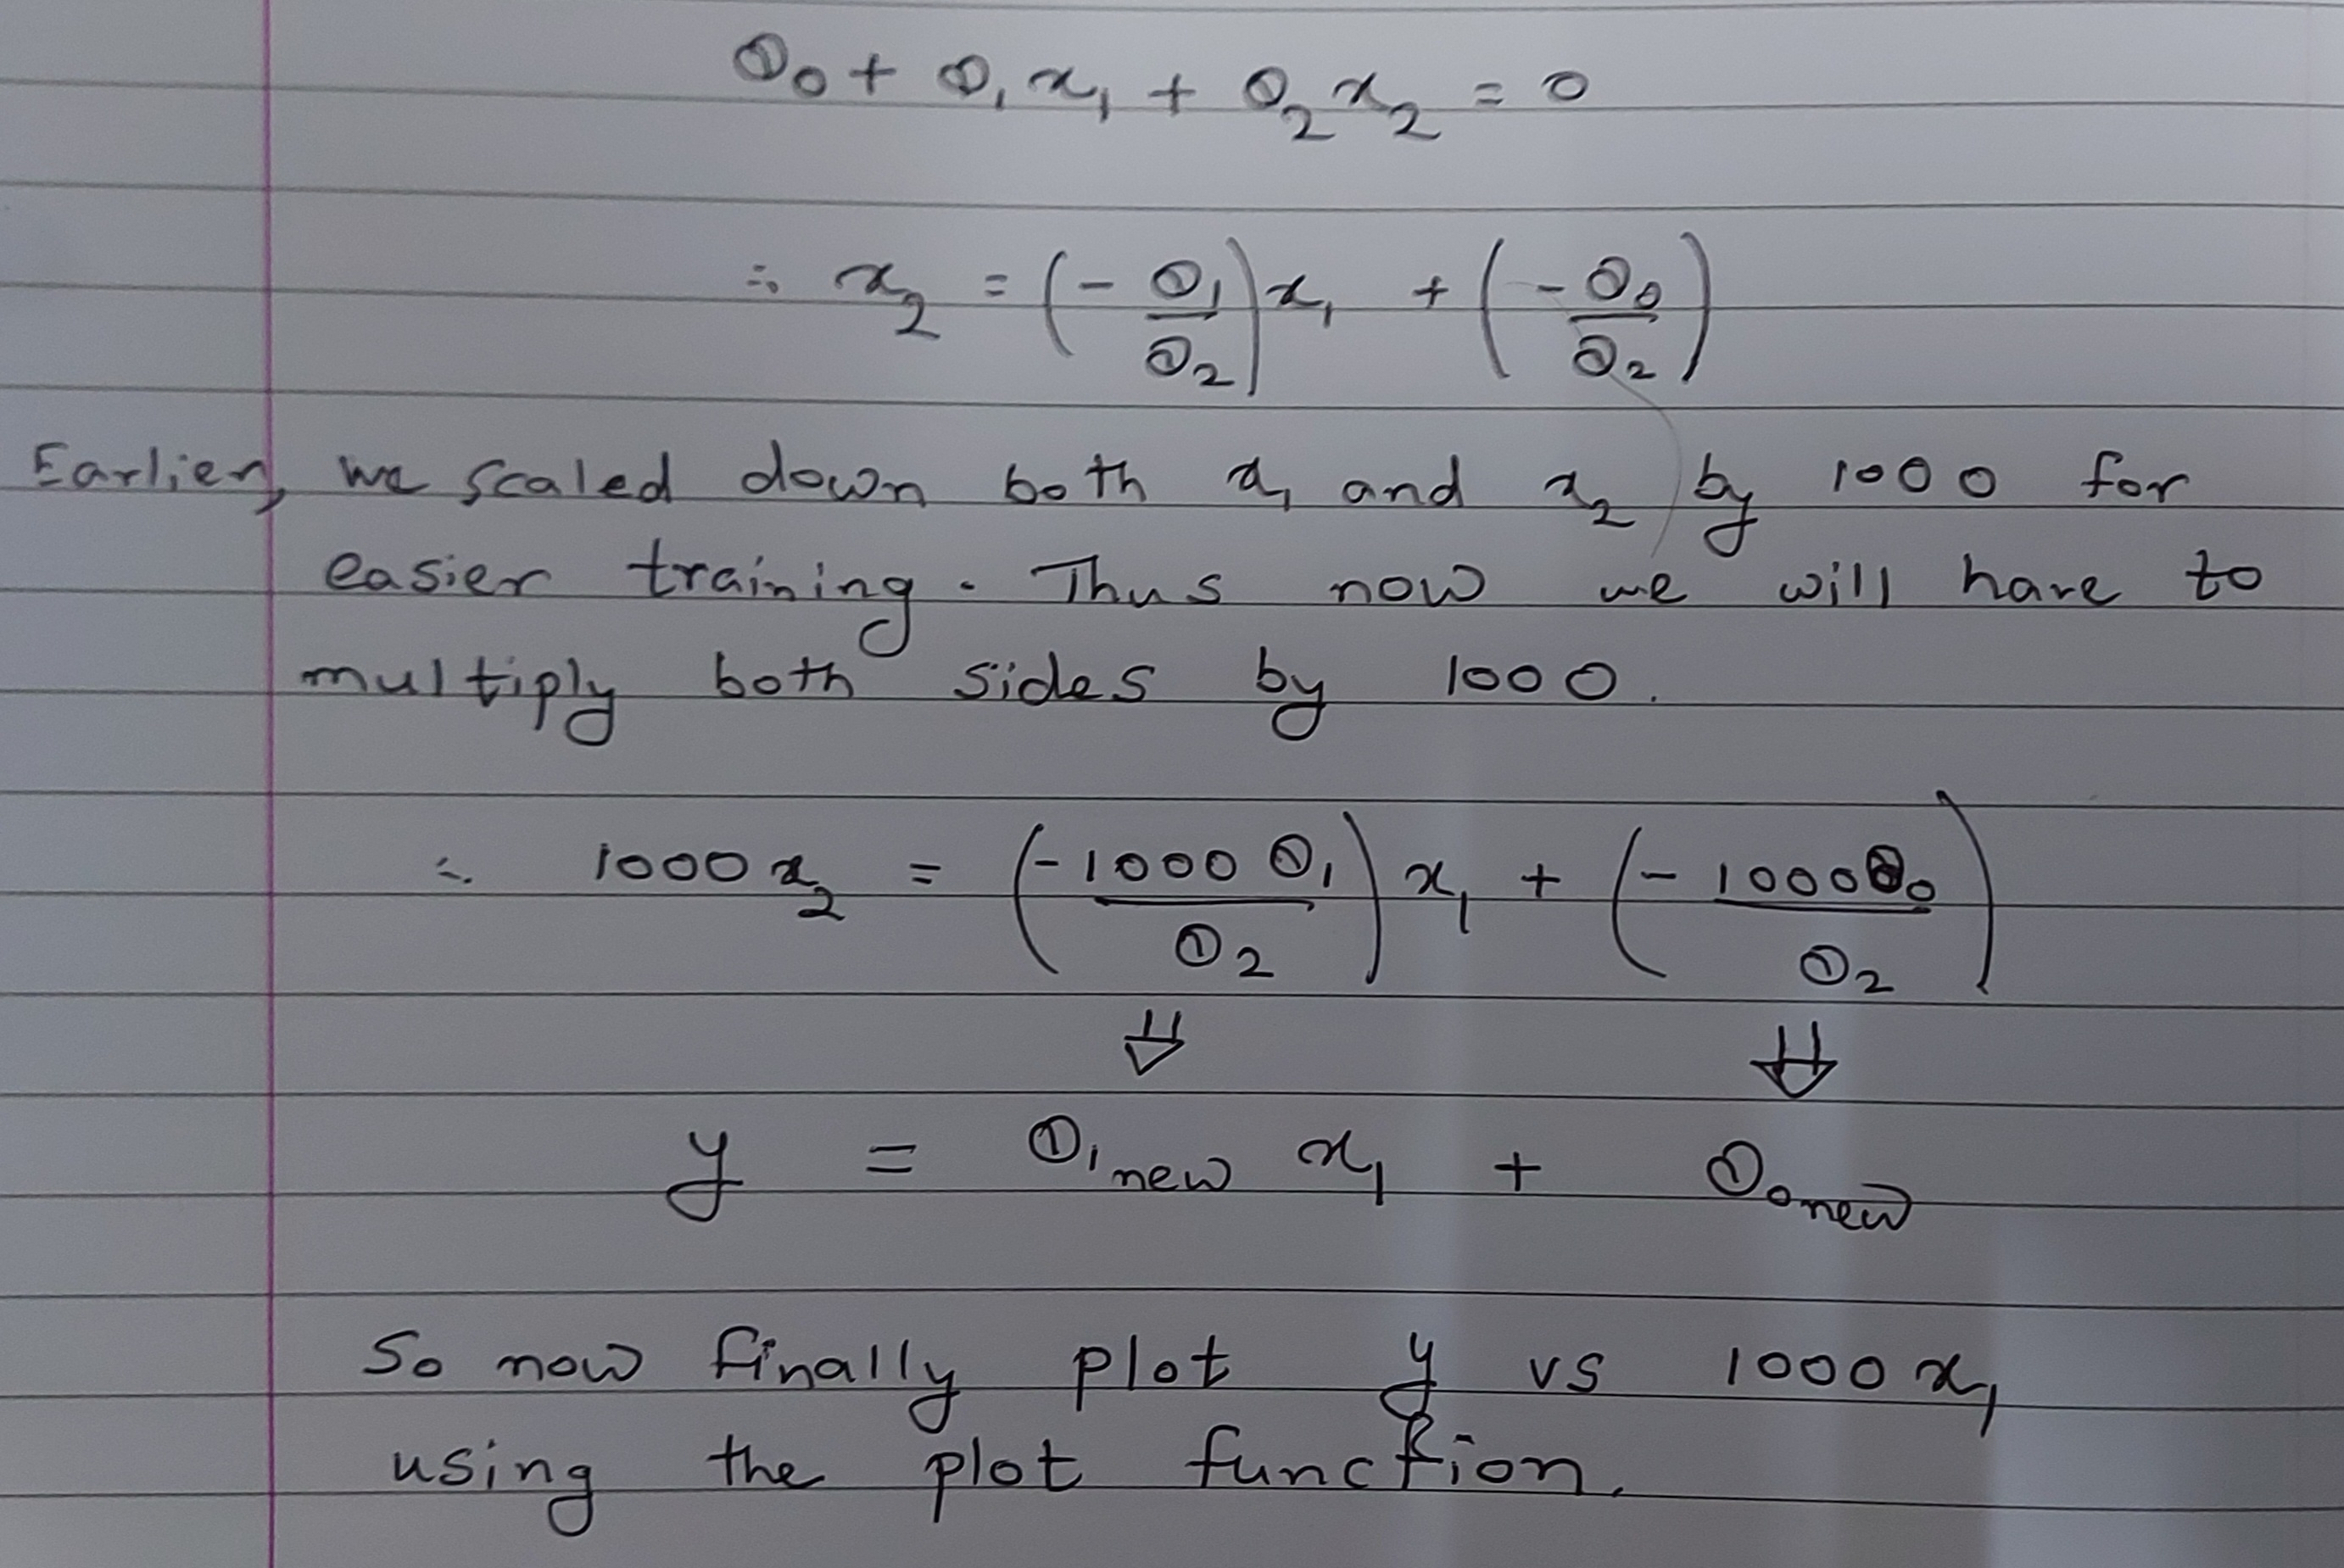

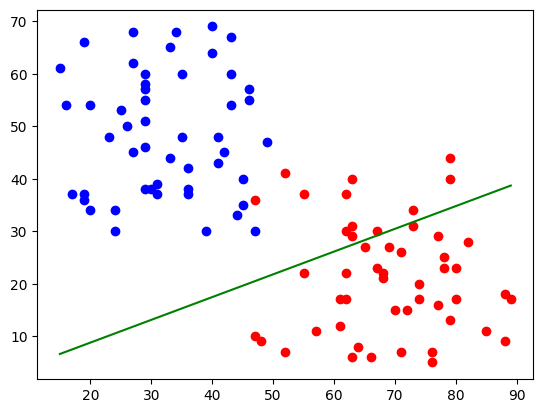

In [156]:
# plot the final line obtained after training along with the initial data on the same plot

plt.scatter(x1_1, x2_1, color="blue")
plt.scatter(x1_0, x2_0, color="red")

x_line = np.linspace(min(np.concatenate((x1_1, x1_0))), max(np.concatenate((x1_1, x1_0))), 100)
y_line = -(theta[0] + theta[1] * x_line + theta[2] * x_line)  # Using unscaled x_line

plt.plot(x_line, y_line, color="green")

plt.show()


